In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("Add_sales_data_2018.csv")
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
data.shape

(205, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [6]:
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [7]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

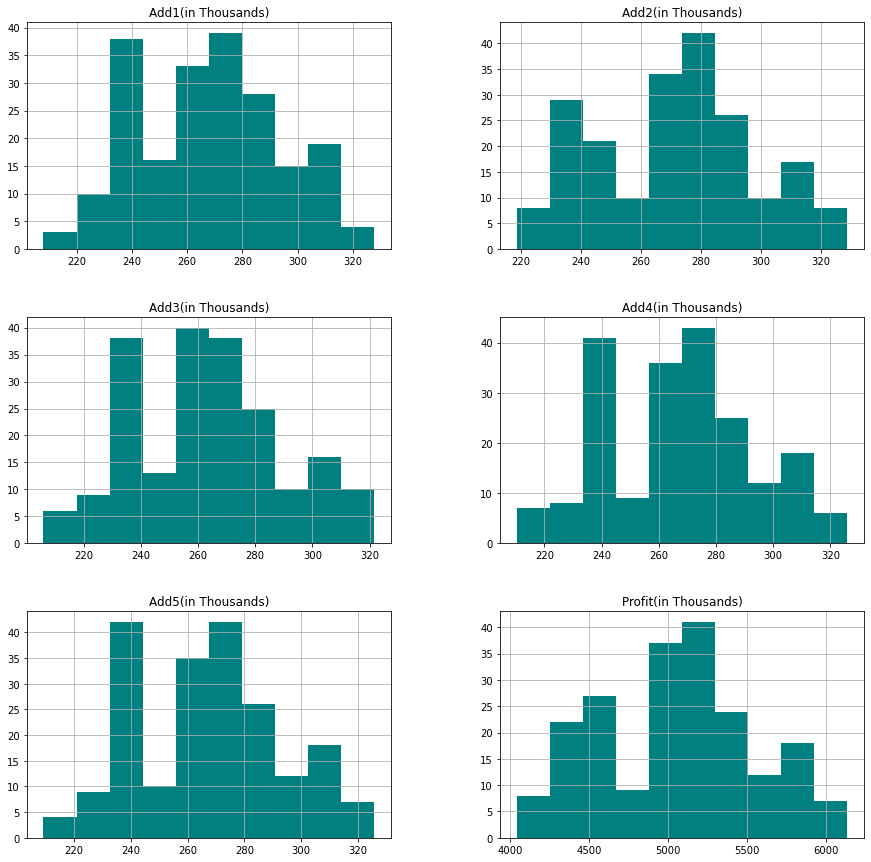

In [68]:
# 1. check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(15,15), color='teal')
plt.show()

<AxesSubplot:>

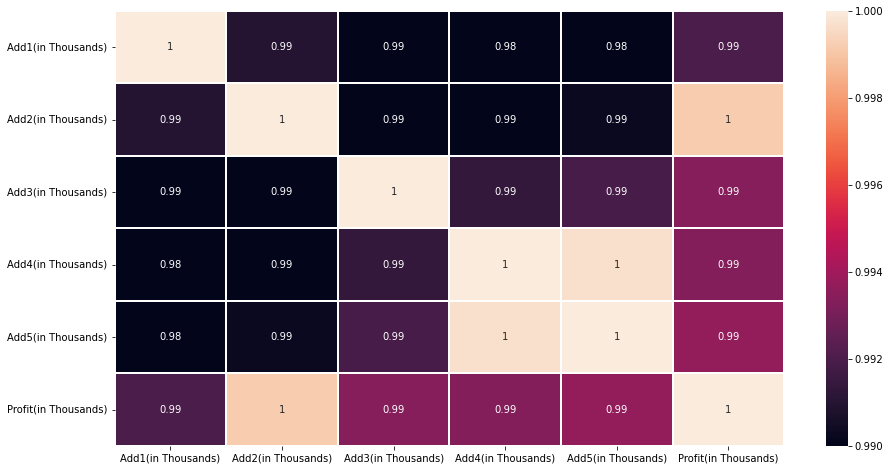

In [69]:
# Checking correlation 
corrmatrix=data.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(corrmatrix,vmin=0.99,vmax=1,annot=True,linewidth=0.2)

In [70]:
# From the histogram, it can be concluded that almost all are normally distributed and when checked correlation, it can be concluded that there is strong positive correlation between the advertising amount spent and profit generation.  

In [71]:
# 2. Build a regression model to predict the profit from the given data and comment your findings on it.
# Building Regression model
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [72]:
data1= data.drop(['Add4(in Thousands)'],axis=1)
data1.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

In [73]:
# Calculating x and y
y=data1['Profit(in Thousands)']
x=data1[['Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)','Add5(in Thousands)',
       'Profit(in Thousands)']]

In [74]:
#Building testing and training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

# Create instance of linear regression model
from sklearn import linear_model
lr=linear_model.LinearRegression()

# Training data and computing predictions
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [75]:
print("y_test values : \n", y_test)
print("\nPrediction values : \n", predictions)

y_test values : 
 15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64

Prediction values : 
 [4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5

In [76]:
# Testing mean squared error (MSE)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,predictions)
print('Mean Squared Error (MSE) is :',MSE)

Mean Squared Error (MSE) is : 6.8401473730346515e-25


In [77]:
# Model is acceptable as the y_test values are almost the same as the predicted values with MSE of 6.8401473730346515e-25 

In [78]:
# 3. Predict the profit generated by the company
#lr.predict([[290,312,309,298,320]]).item()
new_input =[[290,312,309,298,320]]
predictions=model.predict(new_input)
print(predictions)
print("The profit generated by the company is 320")

[320.]
The profit generated by the company is 320
